# Law of Corresponding States and Critical Properties

## Critical Temperature

The *critical temperature* is an experimentally determined property of every atom/molecular species. In words, the critical temperature is defined as the temperature above which a gas can no longer be condensed into a liquid regardless of the change in pressure/density.

We identify various regions of the state diagram based on its position reletive to this critical temperature:

- *super-critical* vapor phase - any state point where $T>T_c$ 

- *sub-critical* vapor phase - any state point where $T<T_c$ and not contained within the VLE envelope

Another way to write the statements above is using the *reduced temperature*, which is a dimensionless representation of the distance from the critical temperature where we simply take the ratio of the temperature to the critical temperature.

$$ T_r=\dfrac{T}{T_c}$$

<div class="alert alert-block alert-danger">
<b>Units:</b> The temperatures used to compute the reduced temperature should be in absolute units (K)
</div>

We can illustrate this definition graphically using *Peng-Robinson Equation of State* and the properties of steam. Using the *phasepy* python package to make the computation easy, we can plot the critical isotherm, $T_r=1$. 

<div class="alert alert-block alert-info">
<b>Interaction:</b> Use the slider below to change the reduced temperature. What do you notice about the shape of the isotherm as you approach the critical temperature?
</div>

<IPython.core.display.Javascript object>


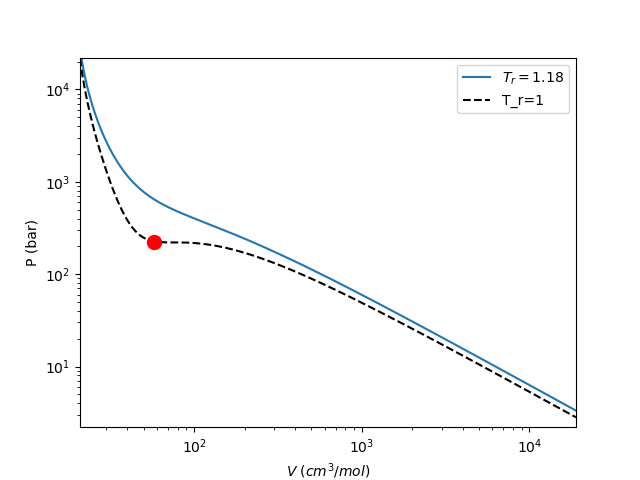

interactive(children=(FloatSlider(value=1.0, description='Tr', max=3.0, step=0.01), Output()), _dom_classes=('…

In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

from phasepy import component, mixture, preos
Tc=647.13
Pc=220.55
Vc=58
w=0.344861
Tr=1
water = component(name='water', Tc=Tc, Pc=Pc, w=w)
eos=preos(water,'mhv_unifac')
R=8.314 
##create the plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('P (bar)')
plt.xlabel(r'$V$ $(cm^3/mol)$')

v=np.logspace(np.log10(eos.b[0]*1.1),np.log10(1000*eos.b[0]),201)
line, = ax.plot(v,eos(Tr*Tc,v),label=r'T_r=%3.2f'%Tr)
ax.plot(v,eos(Tc,v),'--k',label=r'T_r=1')
ax.plot([Vc],[Pc],marker='o',c='r',markersize=10)
plt.xlim(min(v),max(v))
plt.ylim(0.01*Pc,100*Pc)
plt.legend()


##update the plot
def update(Tr = 1):
    line.set_data(v,eos(Tr*Tc,v))
    line.set_label(r'$T_r=%3.2f$'%Tr)
    plt.xlim(min(v),max(v))
    plt.ylim(0.01*Pc,100*Pc)
    plt.legend()
    fig.canvas.draw_idle()

interact(update,Tr=(0,3.0,0.01));



## Critical Properties

Notice that in the plot above that there are many state points that lie along the critical isotherm. There is one state point on the critical isotherm that is different from the rest. It is the point on a isotherm where the following two criteria are satisfied:

$$\bigg(\dfrac{\partial P}{\partial \underline{V}}\bigg)_{T_c}=0$$

$$\bigg(\dfrac{\partial^2 P}{\partial \underline{V}^2}\bigg)_{T_c}=0$$

Not only is the point that satisfies this state point unique on this isotherm, but it is unique on the state diagram. The **critical point** is defined by the location on the critical isotherm that satisfies the above criteria. Just as we have defined the reduced temperature, we can define further reduced properties as well including:

$$P_r=\dfrac{P}{P_c}$$

$$V_r=\dfrac{V_r}{V_c}$$

as well as the critical compressibility as $Z_c=\dfrac{P_c\underline{V}_c}{RT_c}$. For each cubic volumetric equation of state, the critical compressibility has only a single value.

For steam, $T_c=647.13 K$, $P_c=220.55 K$, and $V_c=55 cm^3/mol$. Recalling back to Calculus the definitions above applied to an isotherm imply that the critical volume and critical Pressure must lie on a point that is a local maximum/minimum on the isotherm and that same point must lie at a point where there is a chance in concavity (an inflection point).



<div class="alert alert-block alert-warning">
<b>Example:</b> Using the Van der Waal's equation of state determine the critical temperature, pressure, and volume in terms of the parameters $a$ and $b$. 
</div>

$\quad P=\dfrac{RT}{\underline{V}-b}-\dfrac{a}{\underline{V}^2}$



### Solution

The VDW Equation of state is given as:

$\quad P=\dfrac{RT}{\underline{V}-b}-\dfrac{a}{\underline{V}^2}$

We begin by taking the first derivative with respect to molar volume while holding the temperature constant

$\quad \dfrac{\partial}{\partial \underline{V}}_{T_c}\bigg(\dfrac{RT_c}{\underline{V}-b}-
\dfrac{a}{\underline{V}^2}\bigg)=
\dfrac{-RT_c}{(\underline{V}-b)^2}+
\dfrac{2a}{\underline{V}^3}
$

taking the derivative again, we find:

$\quad \dfrac{\partial}{\partial \underline{V}}_{T_c}
\bigg(\dfrac{-RT_c}{(\underline{V}-b)^2}+
\dfrac{2a}{\underline{V}^3}\bigg)=
\dfrac{2RT_c}{(\underline{V}-b)^3}-
\dfrac{6a}{\underline{V}^4}
$

At the critical volume, $\underline{V}_c$, Eq 1 = 0, so 

$\quad \dfrac{-RT_c}{(\underline{V}_c-b)^2}+
\dfrac{2a}{\underline{V}_c^3}=0$

which we rearrange for substitution into (2) as:

$\quad \dfrac{RT_c}{2a}=
\dfrac{(\underline{V}_c-b)^2}{\underline{V}_c^3}=0$

rearranging (2) similarly, we find:

$\quad \dfrac{RT_c}{2a}=
\dfrac{3(\underline{V}_c-b)^3}{2\underline{V}_c^4}=0$

The l.h.s of both of these equations is now the same so the r.h.s can be equated:

$\quad \dfrac{(\underline{V}_c-b)^2}{\underline{V}_c^3}=\dfrac{3(\underline{V}_c-b)^3}{2\underline{V}_c^4}$

or 

$\quad \underline{V}_c=\dfrac{3}{2}(\underline{V}_c-b)$

The result is that:

$\quad  \underline{V}_c=3b$

substituting this back into the l.h.s equation above, we can solve for the critical temperature:

$\quad \dfrac{RT_c}{2a}=
\dfrac{(2b)^2}{(3b)^3}$

or $T_c=\dfrac{8a}{27Rb}$

substituting this back into the E.O.S, we can find the critical Pressure, $P_c$:

$\quad P_c=\dfrac{4a}{27b^2}-\dfrac{a}{9b^2}=\dfrac{a}{27b^2}$

## Principle of Corresponding State

The principle of corresponding state is the assumption that when all materials state can be described based on their distance from the critical point. In other words, regardless of the identity of the molecules or atoms a plot of $P_{r}$ vs. $V_r$ will look the same regardless of the numerical values of $a$ and $b$

Let's test this principle. In the left panel on the plot below, I compare the Peng-Robinson Equation of state for three substances: *nitrogen*, *water*, and *napthalene*. A table of their critical properties is given below:

| Substance | Symbol | $T_c$ (K) | $P_c$ (bar) |
| --- | --- | --- | --- |
| Nitrogen | N2 | 126.2 | 3.394 |
| Water | H2O | 647.13 | 220.55 |
| Napthalene | C10H8 | 748.4 | 4.05 |



<div class="alert alert-block alert-info">
<b>Interaction:</b> Use the slide below to change the $T_r$ and examine how the isotherm for each substance changes both on an absolute $P-\underline{V}$ diagram and a reduced $P_r-\underline{V}_r$ diagram. 
</div>

<IPython.core.display.Javascript object>


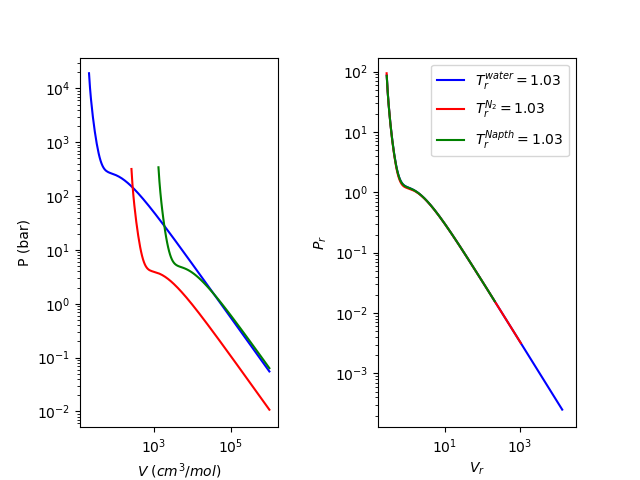

C:\Users\jjr1573\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\jjr1573\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


interactive(children=(FloatSlider(value=1.0, description='Tr', max=5.0, step=0.01), Output()), _dom_classes=('…

In [2]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

from phasepy import component, mixture, preos
Tc=647.13
Pc=220.55
w=0.344861

water = component(name='water', Tc=647.13, Pc=220.55, Vc=56, w=0.3444861)
nitrogen = component(name='Nitrogen', Tc=126.2, Pc=3.394, Vc=89.2, w=0.04)
Napthalene = component(name='Napthalene', Tc=748.4, Pc=4.05, Vc=410, w=0.302)


eos1=preos(water,'mhv_unifac')
eos2=preos(nitrogen,'mhv_unifac')
eos3=preos(Napthalene,'mhv_unifac')


R=8.314 
##create the plot
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fig.subplots_adjust(wspace=0.5)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel('P (bar)')
ax1.set_xlabel(r'$V$ $(cm^3/mol)$')


ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylabel('$P_r$')
ax2.set_xlabel(r'$V_r$')



v=np.logspace(1,6,201)

mask=v>eos1.b*1.1
line1, = ax1.plot(v[mask],eos1(Tr*647.13,v)[mask],'b',label=r'$T_r=%3.2f$'%Tr)
line4, = ax2.plot(v[mask]/56,eos1(Tr*647.13,v)[mask]/220.55,'b',label=r'Tr=%3.2f'%Tr)

mask=v>eos2.b*1.1
line2, = ax1.plot(v[mask],eos2(Tr*126.2,v)[mask],'r',label=r'$T_r=%3.2f$'%Tr)
line5, = ax2.plot(v[mask]*eos2.density(126.2,3.394, 'L'),eos2(Tr*126.2,v)[mask]/3.394,'r',label=r'Tr=%3.2f'%Tr)

mask=v>eos3.b*1.1
line3, = ax1.plot(v[mask],
                  eos3(Tr*748.4,v)[mask],
                  'g',label=r'$T_r=%3.2f$'%Tr)

line6, = ax2.plot(v[mask]*eos3.density(748.4,4.05, 'L'),
                  eos3(Tr*748.4,v)[mask]/4.05,
                  'g',label=r'Tr=%3.2f'%Tr)


##update the plot
def update(Tr = 1):
    mask=v>eos1.b*1.1
    line1.set_data(v[mask],
                   eos1(Tr*647.13,v)[mask])
    line1.set_label(r'$T_{r}^{water}=%3.2f$'%Tr)
    
    line4.set_data(v[mask]*eos1.density(647.13,220.55, 'L'),
                   eos1(Tr*647.13,v)[mask]/220.55)
    line4.set_label(r'$T_{r}^{water}=%3.2f$'%Tr)
    
    mask=v>eos2.b*1.1
    
    line2.set_data(v[mask],
                   eos2(Tr*126.2,v)[mask])
    line2.set_label(r'$T_{r}^{N_2}=%3.2f$'%Tr)
    
    line5.set_data(v[mask]*eos2.density(126.2,3.394, 'L'),
                   eos2(Tr*126.2,v)[mask]/3.394)
    line5.set_label(r'$T_{r}^{N_2}=%3.2f$'%Tr)
    
    mask=v>eos3.b*1.1
    
    line3.set_data(v[mask],
                   eos3(Tr*748.4,v)[mask])
    line3.set_label(r'$T_{r}^{Napth}=%3.2f$'%Tr)
    
    line6.set_data(v[mask]*eos3.density(748.4,4.05, 'L'),
                   eos3(Tr*748.4,v)[mask]/4.05)
    line6.set_label(r'$T_{r}^{Napth}=%3.2f$'%Tr)
    
   
    ax2.legend()
    fig.canvas.draw_idle()

interact(update,Tr=(0,5,0.01));
